## <center> Индивидуальный проект по анализу данных </center>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


ФИО, номер группы: Вахрамеев Сергей Дмитриевич 19БИ-1


## I Подготовка данных

**0.25 балла**

  1) Описание набора данных и признаков (на русском языке). Первичный анализ данных (describe, info , shape) 
     
**1.25 балла** 

  2) Первичный визуальный анализ признаков (используйте matplotlib, seaborn и виды графиков, которые рассматривали на занятиях)

**0.25 балла**

  3) Закономерности, особенности данных которые увидели на глаз - опишите словами 
  
**Разделите выборку на train/test 0.7/0.3, stratify = y, random_state = 17 (п.4 и п.5 обучать ТОЛЬКО на train части)**

**1 балл**

  4) Отбор признаков (корреляция, проверка на выбросы (z-score)) - удалить сильно скоррелированные фичи, фичи с большим кол-вом пропусков/выбросов(если >70%)
  
**1.25 балла**

  5) Преобразование признаков (Масштабирование, заполнение пропусков, label encoding, создание новых признаков. Завернуть преобразования в pipeline) 
  
## II Обучение модели классификации
6) Обучите модели KNN (**0.8 балла** ), лог регрессия(**1 балл**), random forest (**1 балл**), ансамбль (**1.2 балла**)

 - Задать кросс-валидацию(StratifiedKFold), подобрать гиперпараметры(минимум 5 различных гиперпараметров), если параметров много применить RandomizedSearchCV
 - Сделать прогноз roc_auc для X_test и holdout выборок.
 - Нарисовать на графике как меняется ROC-AUC score на train и test и holdout выборках в зависимости от перебора значений основного гиперпараметра (у knn - n_neighbors, log_regression - C, деревья - max_depth; остальным гиперпараметрам модели присвоить оптимальные значения с предыдущего шага)
 
 
## III Выбор наилучшей модели 

**2 балла**

 7) Проведите сравнительный анализ между всеми моделями - сравните accuracy_score и roc_auc на test, holdout выборки, сравните времени работы модели(время за которое выполняется предсказание). Выберите наилучшую.


In [ ]:
from __future__ import division, print_function
# отключим всякие предупреждения Anaconda 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

In [ ]:
pd.set_option('display.max_columns', None)

###  Часть 1. Подготовка данных

In [ ]:
holdout = pd.read_csv('/content/drive/MyDrive/Анализ_Данных_2курс/Лаба2_Анализ_данных/bank-additional-full_holdout.csv')

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Анализ_Данных_2курс/Лаба2_Анализ_данных/bank-additional-full_2.csv")
df.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,28,admin.,single,high.school,no,yes,no,cellular,may,thu,263,1,6,1,success,-1.8,93.876,-40.0,0.683,5008.7,yes
1,42,technician,divorced,university.degree,no,no,no,cellular,jul,fri,221,2,999,0,nonexistent,1.4,93.918,-42.7,4.963,5228.1,no
2,48,services,married,high.school,unknown,no,no,telephone,may,tue,162,1,999,0,nonexistent,1.1,93.994,-36.4,4.856,5191.0,no
3,33,admin.,married,high.school,no,no,yes,telephone,may,fri,84,3,999,0,nonexistent,1.1,93.994,-36.4,4.864,5191.0,no
4,59,retired,married,professional.course,no,yes,no,telephone,jun,wed,109,9,999,0,nonexistent,1.4,94.465,-41.8,4.864,5228.1,no


In [ ]:
df.shape

(26360, 21)

In [ ]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,26360.000000,26360.000000,26360.000000,26360.000000,26360.000000,26360.000000,26360.000000,26360.000000,26360.000000,26360.000000
mean,40.005615,258.074469,2.547534,961.181525,0.176973,0.076229,93.574145,-40.507921,3.613865,5166.700212
std,10.406028,258.757559,2.722900,190.059312,0.504896,1.572781,0.580180,4.653157,1.737088,72.416852
min,17.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.000000,103.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.000000,179.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.000000,4918.000000,43.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26360 entries, 0 to 26359
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             26360 non-null  int64  
 1   job             26360 non-null  object 
 2   marital         26360 non-null  object 
 3   education       26360 non-null  object 
 4   default         26360 non-null  object 
 5   housing         26360 non-null  object 
 6   loan            26360 non-null  object 
 7   contact         26360 non-null  object 
 8   month           26360 non-null  object 
 9   day_of_week     26360 non-null  object 
 10  duration        26360 non-null  int64  
 11  campaign        26360 non-null  int64  
 12  pdays           26360 non-null  int64  
 13  previous        26360 non-null  int64  
 14  poutcome        26360 non-null  object 
 15  emp.var.rate    26360 non-null  float64
 16  cons.price.idx  26360 non-null  float64
 17  cons.conf.idx   26360 non-null 

In [ ]:
for col in df.columns:
    print("{0}, num. NA's: {1}".format(col, pd.isnull(df[col]).sum()))

age, num. NA's: 0
job, num. NA's: 0
marital, num. NA's: 0
education, num. NA's: 0
default, num. NA's: 0
housing, num. NA's: 0
loan, num. NA's: 0
contact, num. NA's: 0
month, num. NA's: 0
day_of_week, num. NA's: 0
duration, num. NA's: 0
campaign, num. NA's: 0
pdays, num. NA's: 0
previous, num. NA's: 0
poutcome, num. NA's: 0
emp.var.rate, num. NA's: 0
cons.price.idx, num. NA's: 0
cons.conf.idx, num. NA's: 0
euribor3m, num. NA's: 0
nr.employed, num. NA's: 0
y, num. NA's: 0


In [ ]:
print(df.isna().sum())
print(df.isnull().sum())

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64
age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


Пропущенных значений не обнаружено

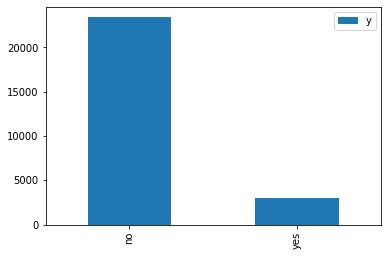

In [ ]:
df['y'].value_counts().plot(kind='bar')
plt.legend()

На основе этого графика можно сделать вывод, что датасет несбалансирован.

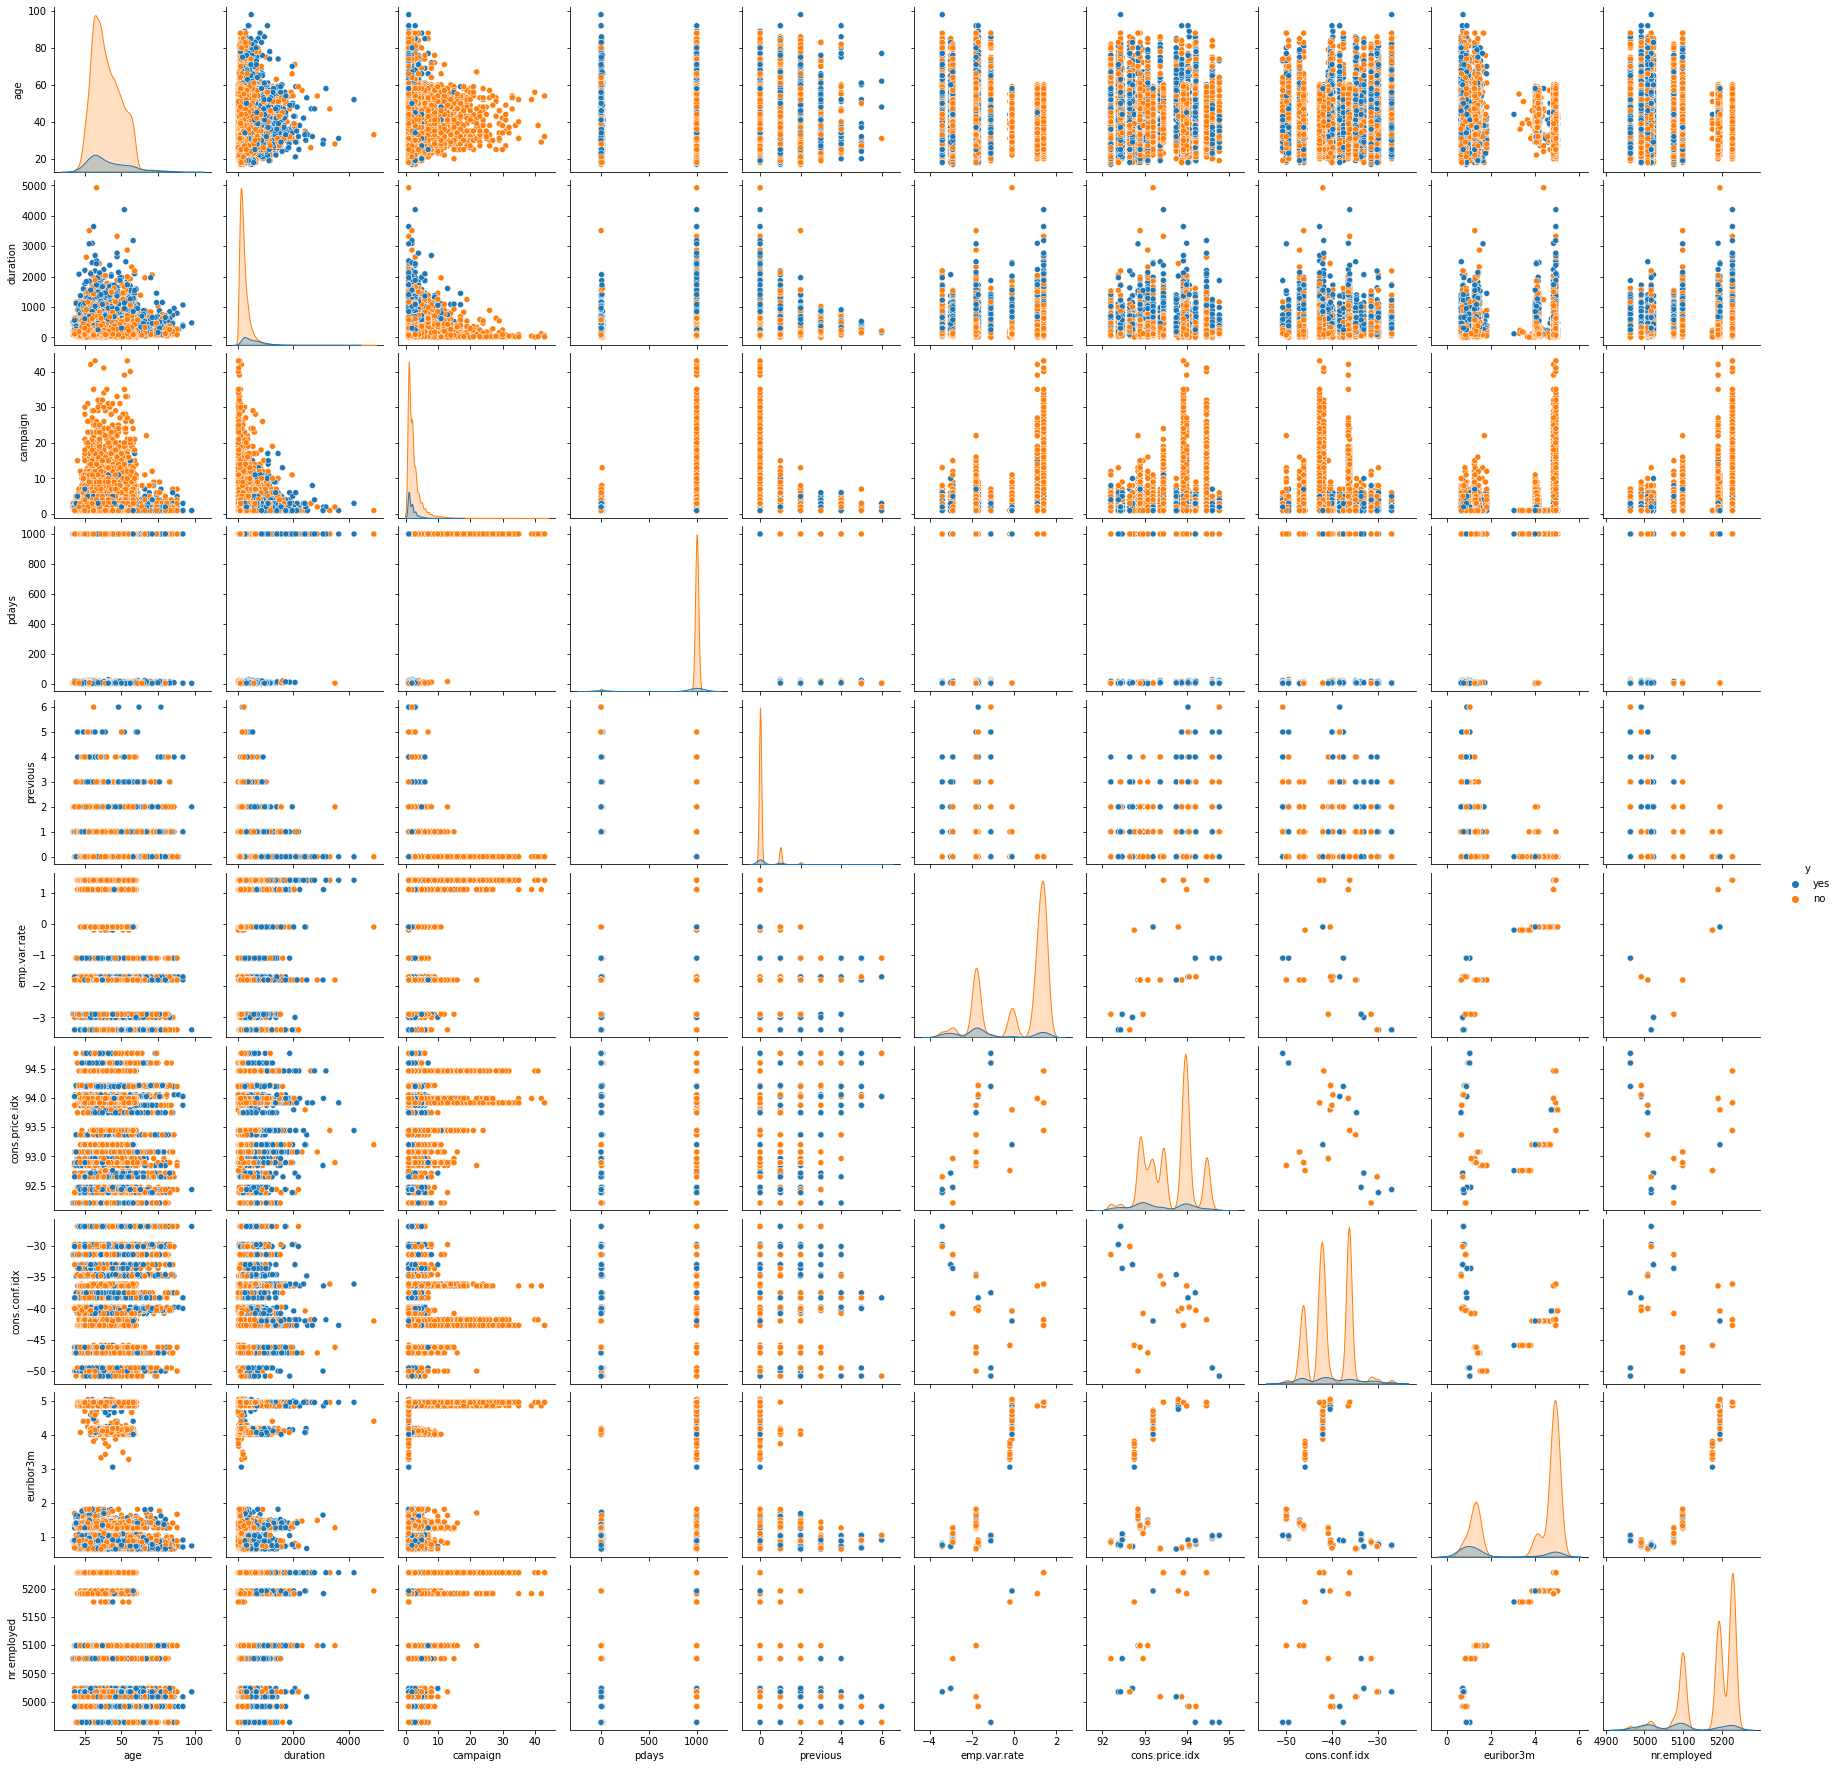

In [ ]:
sns.pairplot(df, hue='y')

Судя по гистограммам на диагонали, все численные признаки распределены +- равномерно в обоих классах

Также обнаружено следующее:
- чем меньше было совершено контактов с клиентом в текущей компании, тем дольше была продолжительность последнего звонка (в целом, логично)
- с более молодыми людьми чаще производилось больше контактов
- чем больше было контаков с клиентом в предыдущей компании, тем меньше контактов в текущей
- 

В датасете есть численные и категориальные признаки

In [ ]:
print("Численные признаки:","\n")
continous_vars=df.describe().columns
print(continous_vars)

Численные признаки: 

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')


In [ ]:
print("Категориальные признаки:","\n")
categorical_vars=df.describe(include=[object]).columns
print(categorical_vars)

Категориальные признаки: 

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')


Визуализация численных признаков 



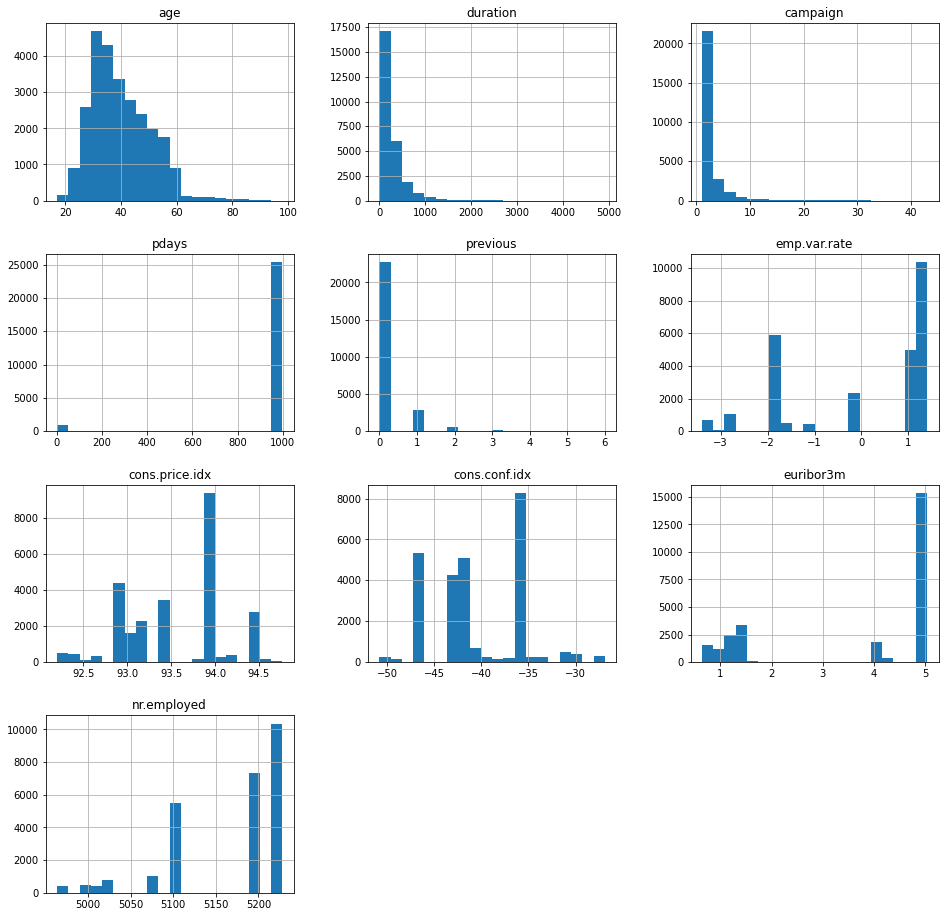

In [ ]:
print("Визуализация численных признаков","\n")
df.hist(column=continous_vars,figsize=(16,16), bins=20)
plt.show()

Стоит учесть числа 999 в признаке pdays. Далее будет произведено преобразование этого числового признака в категориальный

Визуализация категориальных признаков 



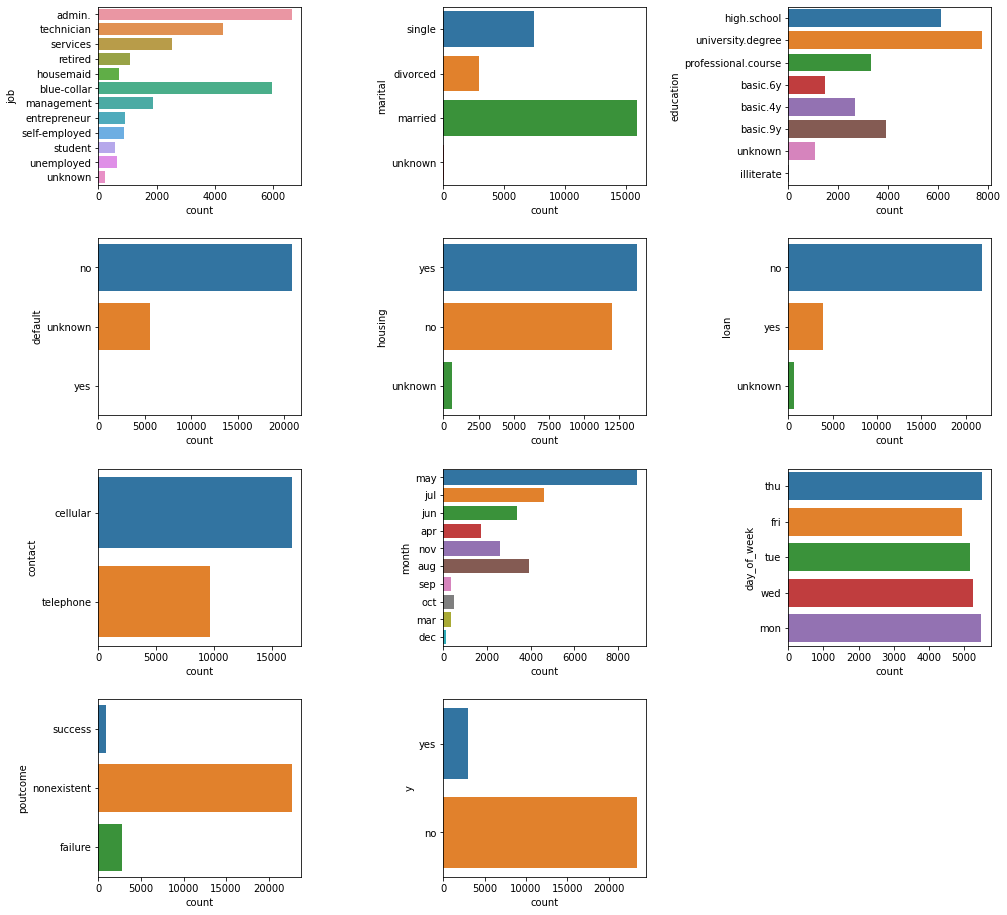

In [ ]:
print("Визуализация категориальных признаков","\n")
fig, axes = plt.subplots(4, 3, figsize=(16, 16))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.7, hspace=0.3)
for i, ax in enumerate(axes.ravel()):
    if i > 10:
        ax.set_visible(False)
        continue
    sns.countplot(y = categorical_vars[i], data=df, ax=ax) 
plt.show()

Похожие значения признака education basic.4y, basic.6y, basic.9y можно объединить в одно

In [ ]:
pd.crosstab(df['default'], df.y)

y,no,yes
default,,
no,18159,2677
unknown,5230,293
yes,1,0


В рамках признака default есть только 1 клиент, о котором мы точно знаем, что у него есть кредит по умолчанию. Эта переменная не дает никакой информации, и она будет удалена далее.

Correlation Matrix 



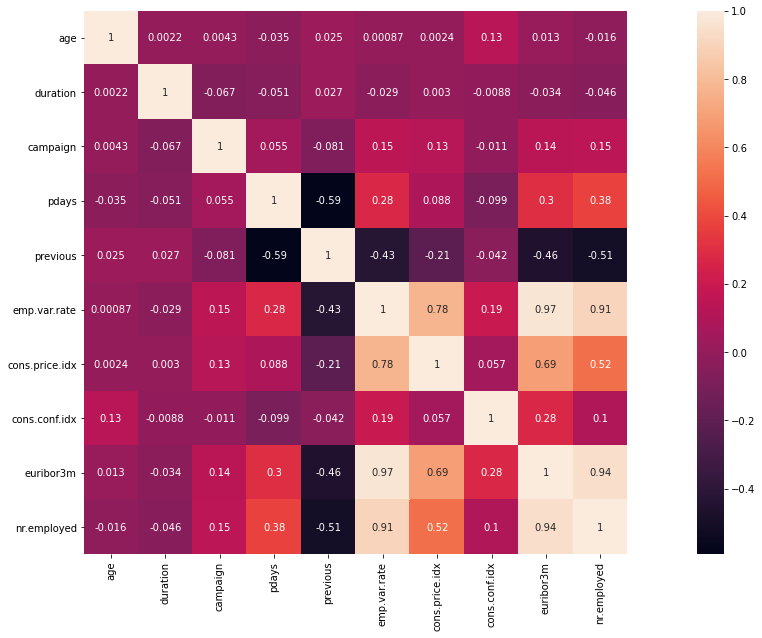

In [ ]:
# корреляционная матрица
print("Correlation Matrix","\n")    
correlation=df.corr(method="pearson")
plt.figure(figsize=(25,10))
sns.heatmap(correlation,vmax=1,square=True,annot=True)
plt.show()

Высокий коэффицинт корреляции (>0.9) наблюдается у признаков emp.var.rate, euribor3m, nr.employed. Нужно удалить эти признаки.
Также необходимо изменить значения признака pdays(999). Признак duration сильно влияет на выходную цель, поэтому его также стоит отбросить. Продолжительность звонка не известна до выполнения вызова (упомянуто в описании признаков в начале).

Разделим датасет на train/test


In [ ]:
X = df[[x for x in df if x != 'y']]
y = df['y']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=17, stratify = y)

Вычислим z-score

In [ ]:
zs = pd.DataFrame((np.abs(zscore(X_train[continous_vars])) > 3), columns=X_train[continous_vars].columns)
for col in zs.columns:
    print(zs[col].value_counts())

False    18296
True       156
Name: age, dtype: int64
False    18068
True       384
Name: duration, dtype: int64
False    18068
True       384
Name: campaign, dtype: int64
False    17756
True       696
Name: pdays, dtype: int64
False    17940
True       512
Name: previous, dtype: int64
False    18452
Name: emp.var.rate, dtype: int64
False    18452
Name: cons.price.idx, dtype: int64
False    18452
Name: cons.conf.idx, dtype: int64
False    18452
Name: euribor3m, dtype: int64
False    18452
Name: nr.employed, dtype: int64


Повышенное значение z-score есть в 4х столбцах. Посмотрим на них 'глазами'

In [ ]:
for column in X_train[continous_vars].columns[:5]:
    print(column)
    X_train['{}_zscore'.format(column)] = zscore(X_train[column])

age
duration
campaign
pdays
previous


In [ ]:
col = 'age_zscore'
pd.concat([X_train[X_train[col] > 3], X_train[X_train[col] < -3]]).sort_values(by=col, ascending=False)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,age_zscore,duration_zscore,campaign_zscore,pdays_zscore,previous_zscore
19319,98,retired,married,basic.4y,unknown,yes,no,cellular,oct,fri,476,1,2,2,success,-3.4,92.431,-26.9,0.730,5017.5,5.585234,0.837881,-0.567401,-5.072117,3.625040
16929,92,retired,divorced,unknown,unknown,no,no,cellular,may,wed,405,3,999,1,failure,-1.8,93.876,-40.0,0.697,5008.7,5.007444,0.564304,0.165924,0.197983,1.637778
2047,89,retired,divorced,basic.4y,no,no,no,cellular,jun,mon,245,1,999,0,nonexistent,-1.7,94.055,-39.8,0.720,4991.6,4.718549,-0.052205,-0.567401,0.197983,-0.349483
25642,88,retired,divorced,basic.4y,no,yes,no,cellular,mar,wed,85,1,999,0,nonexistent,-1.8,92.843,-50.0,1.663,5099.1,4.622251,-0.668715,-0.567401,0.197983,-0.349483
15365,88,retired,divorced,basic.4y,no,yes,yes,cellular,mar,wed,103,3,999,0,nonexistent,-1.8,92.843,-50.0,1.663,5099.1,4.622251,-0.599358,0.165924,0.197983,-0.349483
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1860,72,retired,married,basic.4y,no,yes,no,cellular,jul,fri,119,9,999,1,failure,-1.7,94.215,-40.3,0.822,4991.6,3.081478,-0.537707,2.365899,0.197983,1.637778
16295,72,retired,married,basic.4y,no,yes,no,cellular,jul,mon,268,1,999,0,nonexistent,-1.7,94.215,-40.3,0.870,4991.6,3.081478,0.036418,-0.567401,0.197983,-0.349483
5803,72,retired,married,professional.course,no,no,no,cellular,mar,fri,87,1,3,1,success,-1.8,93.369,-34.8,0.653,5008.7,3.081478,-0.661009,-0.567401,-5.066831,1.637778
14867,72,retired,married,basic.4y,no,yes,no,cellular,may,wed,443,4,999,0,nonexistent,-1.8,93.876,-40.0,0.672,5008.7,3.081478,0.710725,0.532587,0.197983,-0.349483


- age - люди возрастом >= 72 лет 
- duration - длительность звонка >= 1038
- campaign - >= 11 звонков
- pdays - наличие 999
- previous - >= 2 контактов

In [ ]:
X_train[X_train['age'] >= 60].shape

(518, 25)

In [ ]:
X_train['previous'].value_counts()

0    15923
1     2017
2      370
3       95
4       34
5       11
6        2
Name: previous, dtype: int64

Удаляем значения с z-score > 3

In [ ]:
pd.merge(x_tr, y_train, left_index=True, right_index=True)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,age_zscore,duration_zscore,campaign_zscore,pdays_zscore,previous_zscore,y
5112,52,admin.,divorced,university.degree,unknown,yes,yes,cellular,jul,tue,201,9,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,1.155512,-0.221746,2.365899,0.197983,-0.349483,no
17939,20,student,single,high.school,no,yes,no,cellular,aug,tue,532,1,999,1,failure,-2.9,92.201,-31.4,0.859,5076.2,-1.926034,1.053659,-0.567401,0.197983,1.637778,yes
7718,32,services,married,basic.9y,unknown,yes,no,cellular,nov,thu,251,4,999,0,nonexistent,-0.1,93.200,-42.0,4.076,5195.8,-0.770454,-0.029086,0.532587,0.197983,-0.349483,no
2110,49,management,divorced,high.school,unknown,no,no,telephone,may,mon,124,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.866617,-0.518441,-0.567401,0.197983,-0.349483,no
22637,31,services,single,high.school,no,yes,no,telephone,jun,tue,953,1,999,0,nonexistent,1.4,94.465,-41.8,4.864,5228.1,-0.866753,2.675850,-0.567401,0.197983,-0.349483,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13567,58,retired,married,basic.9y,no,no,yes,cellular,may,fri,235,2,999,0,nonexistent,-1.8,92.893,-46.2,1.259,5099.1,1.733302,-0.090737,-0.200738,0.197983,-0.349483,no
12071,26,admin.,single,university.degree,no,yes,no,cellular,may,mon,76,2,999,1,failure,-1.8,92.893,-46.2,1.299,5099.1,-1.348244,-0.703394,-0.200738,0.197983,1.637778,no
3297,45,housemaid,married,professional.course,unknown,no,no,telephone,jun,thu,210,3,999,0,nonexistent,1.4,94.465,-41.8,4.866,5228.1,0.481424,-0.187067,0.165924,0.197983,-0.349483,no
1697,46,admin.,married,university.degree,no,no,no,cellular,aug,mon,67,5,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,0.577722,-0.738072,0.899249,0.197983,-0.349483,no


In [ ]:
X_train.shape

(18452, 25)

In [ ]:
X_train = X_train.loc[(X_train['age_zscore'] < 3) & (X_train['duration_zscore'] < 3) & (X_train['campaign_zscore'] < 3) & (X_train['previous_zscore'] < 3)]
X_train = X_train.loc[(X_train['age_zscore'] > -3) & (X_train['duration_zscore'] > -3) & (X_train['campaign_zscore'] > -3) & (X_train['previous_zscore'] > -3)]

In [ ]:
X_train.drop(X_train.columns[-5:], axis=1, inplace = True)

In [ ]:
y_train = pd.merge(X_train, y_train, left_index=True, right_index=True)['y']

Обернем преобразования в pipeline

In [ ]:
(X_train.shape, y_train.shape)

((17054, 20), (17054,))

In [ ]:
X_train.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
5112,52,admin.,divorced,university.degree,unknown,yes,yes,cellular,jul,tue,201,9,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1
17939,20,student,single,high.school,no,yes,no,cellular,aug,tue,532,1,999,1,failure,-2.9,92.201,-31.4,0.859,5076.2
7718,32,services,married,basic.9y,unknown,yes,no,cellular,nov,thu,251,4,999,0,nonexistent,-0.1,93.200,-42.0,4.076,5195.8
2110,49,management,divorced,high.school,unknown,no,no,telephone,may,mon,124,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
22637,31,services,single,high.school,no,yes,no,telephone,jun,tue,953,1,999,0,nonexistent,1.4,94.465,-41.8,4.864,5228.1


In [ ]:
from sklearn.pipeline import make_union, make_pipeline
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.feature_extraction import DictVectorizer

def edit_pdays(df):
    df["pdays_cat"]=[0 if each==999 else 1 for each in df.pdays]
    df=df.drop(["pdays"],axis=1)
    return df[['pdays_cat']]

def get_categ_col(df):
    df.replace(to_replace = ['basic.6y','basic.4y', 'basic.9y'], value = 'basic', inplace=True)
    df=df.drop(['default'],axis=1)
    return df[['job', 'marital', 'education', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'pdays_cat']]

def get_num_cols(df):
    df = df.drop(['emp.var.rate', 'euribor3m', 'nr.employed', 'duration'], axis=1)
    return df[['age', 'campaign', 'previous', 'cons.price.idx', 'cons.conf.idx']]

vec = make_union(*[
    make_pipeline(FunctionTransformer(edit_pdays, validate=False)),
    make_pipeline(FunctionTransformer(get_categ_col, validate=False), OneHotEncoder(sparse=False)),
    make_pipeline(FunctionTransformer(get_num_cols, validate=False), MinMaxScaler()),
])
 
X_train = vec.fit_transform(X_train)
X_test = vec.transform(X_test)

In [ ]:
X_train.shape

(17054, 56)

Закодируем значения целевой переменной: 1 - yes, 0 - no

In [ ]:
from sklearn.preprocessing import LabelEncoder

target_encoder = LabelEncoder().fit(y_train)

y_train_edited = target_encoder.transform(y_train)

In [ ]:
target_y_encoder = LabelEncoder().fit(y_test)

y_test_edited = target_encoder.transform(y_test)

In [ ]:
y_train_edited

array([0, 1, 0, ..., 0, 0, 0])

In [ ]:
y_test_edited

array([0, 0, 0, ..., 0, 0, 0])

###  Часть 2. Обучение модели классификации

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import roc_auc_score

#### KNN

In [ ]:
knn_params = {
    'n_neighbors': range(1, 15),
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': range(1, 50),
    'metric': ['euclidean','manhattan','minkowski']
}

knn = RandomizedSearchCV(
    estimator=KNeighborsClassifier(),
    param_distributions=knn_params,
    scoring='roc_auc', 
    cv=5, n_jobs=-1, verbose=True
).fit(X_train, y_train_edited)


Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


In [ ]:
print(knn.best_score_)
print(knn.best_estimator_)

0.7142069929190619
KNeighborsClassifier(algorithm='kd_tree', leaf_size=26, metric='manhattan',
                     n_neighbors=14, weights='distance')


#### Логистическая регрессия

In [ ]:
lr_params = {
    'C': np.linspace(1e-4, 1000, 200),
    'penalty': ['l1', 'l2', 'elasticnet'],
    'class_weight': ['balanced'],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'tol': np.linspace(1e-6, 1, 1000)
}

lr = RandomizedSearchCV(
    estimator=LogisticRegression(),
    param_distributions=lr_params,
    scoring='roc_auc',
    cv=5, n_jobs=-1, verbose=True
).fit(X_train, y_train_edited)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
15 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: Solver

In [ ]:
print(lr.best_score_)
print(lr.best_estimator_)

0.7684407480365052
LogisticRegression(C=437.1859859296482, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg',
                   tol=0.8628629999999999, verbose=0, warm_start=False)


In [ ]:
print(lr.best_score_)
print(lr.best_estimator_)

0.7742566929984124
LogisticRegression(C=638.1909909547738, class_weight='balanced',
                   solver='newton-cg', tol=0.8628629999999999)


#### Random Forest

In [ ]:
rfc = RandomForestClassifier()
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]
max_features = ['log2', 'sqrt']
max_depth = [int(x) for x in np.linspace(start = 1, stop = 15, num = 15)]
min_samples_split = [int(x) for x in np.linspace(start = 2, stop = 50, num = 10)]
min_samples_leaf = [int(x) for x in np.linspace(start = 2, stop = 50, num = 10)]
bootstrap = [True, False]
param_dist = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
rs = RandomizedSearchCV(rfc, 
                        param_dist, 
                        n_iter = 100, 
                        cv = 5, 
                        verbose = 1, 
                        n_jobs=-1, 
                        random_state=0)
rs.fit(X_train, y_train_edited)
rs.best_params_

Fitting 5 folds for each of 100 candidates, totalling 500 fits


{'bootstrap': False,
 'max_depth': 15,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 23,
 'n_estimators': 600}

In [ ]:
print(rs.best_score_)

0.9164420612628972


#### Stacking

In [ ]:
estimators = [('knn', knn.best_estimator_), 
              ('lr', lr.best_estimator_), 
              ('rs', rs.best_estimator_)
]

sc_params = {
    'final_estimator': [knn.best_estimator_, 
                        lr.best_estimator_, 
                        rs.best_estimator_],
    'stack_method': ['auto', 'predict_proba', 'decision_function', 'predict'],
    'passthrough': [True, False],
    'verbose': range(1, 100)
}

stack = StackingClassifier(estimators=estimators)

sc = RandomizedSearchCV(
    estimator=stack, 
    param_distributions=sc_params, 
    scoring='roc_auc', 
    cv=5, n_jobs=-1, verbose=True
).fit(X_train, y_train_edited)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
15 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_stacking.py", line 488, in fit
    return super().fit(X, self._le.transform(y), sample_weight)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_stacking.py", line 188, in fit
    for name, est, meth in zip(names, all_estimators, stack_me

In [ ]:
print(sc.best_score_)
print(sc.best_estimator_)

0.8018270461363741
StackingClassifier(estimators=[('knn',
                                KNeighborsClassifier(algorithm='kd_tree',
                                                     leaf_size=26,
                                                     metric='manhattan',
                                                     n_neighbors=14,
                                                     weights='distance')),
                               ('lr',
                                LogisticRegression(C=638.1909909547738,
                                                   class_weight='balanced',
                                                   solver='newton-cg',
                                                   tol=0.8628629999999999)),
                               ('rs',
                                RandomForestClassifier(bootstrap=False,
                                                       max_depth=15,
                                                       max_features='sq

In [ ]:
models = {
          'KNN': knn.best_estimator_,
          'LR': lr.best_estimator_,
          'RS': rs.best_estimator_,
          'SC': sc.best_estimator_
}

#### Проверка моделей

Проверим работу на holdout выборке

In [ ]:
X_holdout = holdout[[x for x in holdout if x != 'y']]
y_holdout = holdout['y']

X_holdout = vec.transform(X_holdout)

Закодируем y_holdout

In [ ]:
holdout_y_encoder = LabelEncoder().fit(y_holdout)

y_holdout_edited = target_encoder.transform(y_holdout)

#### ROC_AUC

In [ ]:
print('ROC AUC for X_test')
for model_name, model in models.items():
    print('ROC AUC of {0: <4} for X_test:'.format(model_name), roc_auc_score(y_test_edited, model.predict_proba(X_test)[:,1]))

print('\nROC AUC for holdout')
for model_name, model in models.items():
    print('ROC AUC of {0: <4} for holdout:'.format(model_name), roc_auc_score(y_holdout_edited, model.predict_proba(X_holdout)[:,1]))

ROC AUC for X_test
ROC AUC of KNN  for X_test: 0.7181964051708957
ROC AUC of LR   for X_test: 0.7649111577191003
ROC AUC of RS   for X_test: 0.8021554035757636
ROC AUC of SC   for X_test: 0.7987944781208759

ROC AUC for holdout
ROC AUC of KNN  for holdout: 0.7155131875324309
ROC AUC of LR   for holdout: 0.7705970063446389
ROC AUC of RS   for holdout: 0.7938350570781642
ROC AUC of SC   for holdout: 0.7943547602481249


На обоих выборках лучшими оказались random forest и stacking

In [ ]:
roc_aucs = {
    'KNN': {
        'train': [],
        'test': [],
        'holdout': []
    },
    'LR': {
        'train': [],
        'test': [],
        'holdout': []
    },
    'RS': {
        'train': [],
        'test': [],
        'holdout': []
    },
}

params = {
    'n_neighbors': range(1, 15),
    'C': np.linspace(1e-4, 1000, 200),
    'max_depth': range(1, 10),
}

for i in params['n_neighbors']:
    knn_model = KNeighborsClassifier(
        n_neighbors=i, 
        weights=knn.best_params_['weights'], 
        algorithm=knn.best_params_['algorithm'],
        leaf_size=knn.best_params_['leaf_size'],
        metric=knn.best_params_['metric'],
    ).fit(X_train, y_train_edited)
    roc_aucs['KNN']['train'].append(roc_auc_score(y_train_edited, knn_model.predict_proba(X_train)[:,1]))
    roc_aucs['KNN']['test'].append(roc_auc_score(y_test_edited, knn_model.predict_proba(X_test)[:,1]))
    roc_aucs['KNN']['holdout'].append(roc_auc_score(y_holdout_edited, knn_model.predict_proba(X_holdout)[:,1]))

for i in params['C']:
    lr_model = LogisticRegression(
        C=i,
        class_weight=lr.best_params_['class_weight'],
        tol=lr.best_params_['tol'],
        penalty=lr.best_params_['penalty'],
        solver=lr.best_params_['solver'],
    ).fit(X_train, y_train_edited)
    roc_aucs['LR']['train'].append(roc_auc_score(y_train_edited, lr_model.predict_proba(X_train)[:,1]))
    roc_aucs['LR']['test'].append(roc_auc_score(y_test_edited, lr_model.predict_proba(X_test)[:,1]))
    roc_aucs['LR']['holdout'].append(roc_auc_score(y_holdout_edited, lr_model.predict_proba(X_holdout)[:,1]))

for i in params['max_depth']:
    rs_model = RandomForestClassifier(
        max_depth=i,
        max_features=rs.best_params_['max_features'],
        min_samples_split=rs.best_params_['min_samples_split'],
        n_estimators=rs.best_params_['n_estimators']
    ).fit(X_train, y_train)
    roc_aucs['RS']['train'].append(roc_auc_score(y_train_edited, rs_model.predict_proba(X_train)[:,1]))
    roc_aucs['RS']['test'].append(roc_auc_score(y_test_edited, rs_model.predict_proba(X_test)[:,1]))
    roc_aucs['RS']['holdout'].append(roc_auc_score(y_holdout_edited, rs_model.predict_proba(X_holdout)[:,1]))

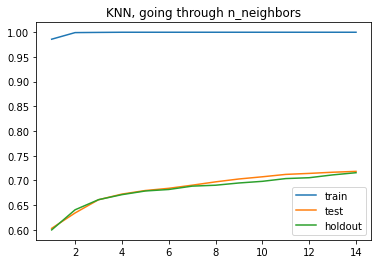

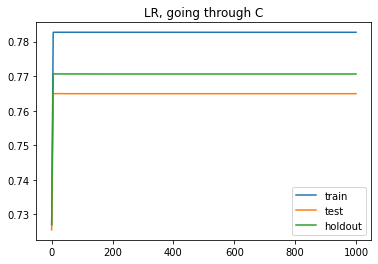

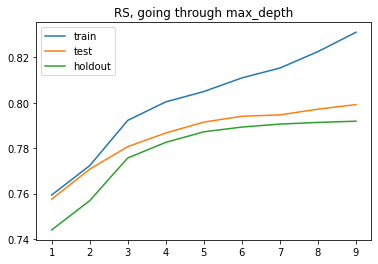

In [ ]:
for (model_name, rocs), (param_name, param) in zip(roc_aucs.items(), params.items()):
    plt.title(f'{model_name}, going through {param_name}')
    plt.plot(param, rocs['train'])
    plt.plot(param, rocs['test'])
    plt.plot(param, rocs['holdout'])
    plt.legend(['train', 'test', 'holdout'])
    plt.show()
    print()

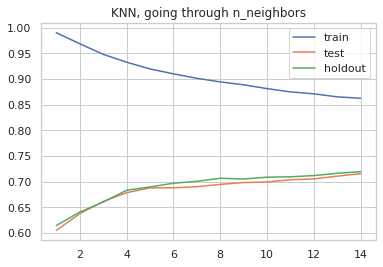

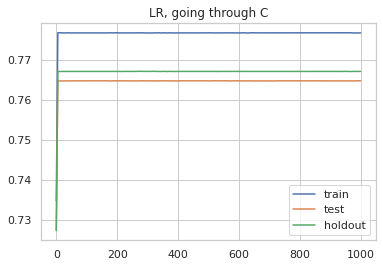

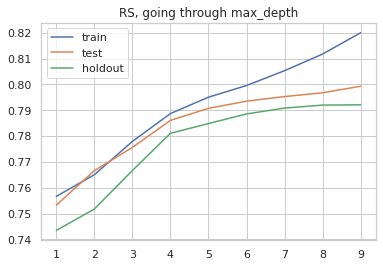

In [ ]:
for (model_name, rocs), (param_name, param) in zip(roc_aucs.items(), params.items()):
    plt.title(f'{model_name}, going through {param_name}')
    plt.plot(param, rocs['train'])
    plt.plot(param, rocs['test'])
    plt.plot(param, rocs['holdout'])
    plt.legend(['train', 'test', 'holdout'])
    plt.show()
    print()

На всех моделях train кривая выше остальных означает переобучение. В случае линейной регрессии качество модели не меняется с увеличением гиперпараметра. В случае random forest увеличение глубины деревьев для всех выборок улучшает предсказание. В случае KNN кривая train ведет себя обратно относительно других кривых. Кривые test и holdout очень близки

###  Часть 3. Выбор наилучшей модели

In [ ]:
from sklearn.metrics import accuracy_score
from time import time

In [ ]:
models_results = pd.DataFrame(columns=['test_acc', 'test_roc', 'holdout_acc', 'holdout_roc', 'test_time', 'holdout_time'])

for model_name, model in models.items():
    test_time = time()
    y_test_pred = model.predict(X_test)
    test_time = time() - test_time

    holdout_time = time()
    y_holdout_pred = model.predict(X_holdout)
    holdout_time = time() - holdout_time

    test_acc = accuracy_score(y_test_edited, y_test_pred)
    test_roc = roc_auc_score(y_test_edited, y_test_pred)

    holdout_acc = accuracy_score(y_holdout_edited, y_holdout_pred)
    holdout_roc = roc_auc_score(y_holdout_edited, y_holdout_pred)

    models_results.loc[model_name, 'test_acc'] = test_acc
    models_results.loc[model_name, 'test_roc'] = test_roc
    models_results.loc[model_name, 'holdout_acc'] = holdout_acc
    models_results.loc[model_name, 'holdout_roc'] = holdout_roc
    models_results.loc[model_name, 'test_time'] = test_time
    models_results.loc[model_name, 'holdout_time'] = holdout_time

In [ ]:
models_results

,test_acc,test_roc,holdout_acc,holdout_roc,test_time,holdout_time
KNN,0.890744,0.584229,0.893057,0.584593,27.288726,13.426212
LR,0.797547,0.714941,0.803108,0.715951,0.003488,0.00105
RS,0.895928,0.594499,0.900461,0.605699,0.787542,0.7916
SC,0.897193,0.597171,0.900947,0.605503,14.176707,14.836591


In [ ]:
models_results

,test_acc,test_roc,holdout_acc,holdout_roc,test_time,holdout_time
KNN,0.895928,0.584211,0.89864,0.593854,3.26794,3.33783
LR,0.813733,0.717693,0.815853,0.713255,0.000930071,0.000898838
RS,0.898837,0.602507,0.901675,0.608265,0.452646,0.456029
SC,0.898837,0.601527,0.902039,0.60847,4.12392,4.28076


### Заключение

По результатам сравнения наилучшей моделью оказалась логистическая регрессия - она была значительно быстрее остальных моделей. При измерении roc_auc логистическая регрессия значительно превосходит остальные модели. При измерении accuracy лучше остальных себя показали random forest и stacking - их значения находятся в районе 0.9. 